<a href="https://colab.research.google.com/github/donosonahuel/tendencias-historica-videojuegos/blob/main/An%C3%A1lisis_de_Tendencias_y_Ventas_Hist%C3%B3ricas(Videojuegos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📂 Adquisición y Comprensión del Dataset

## Importando biblioteca y archivo

In [4]:
import pandas as pd

In [5]:
df_video_games_sales = pd.read_csv('/content/vgsales.csv')

## Inspección del DataSet

In [6]:
df_video_games_sales.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
df_video_games_sales.info() # Se puede identificar que falta datos en "Year" y "Publisher", y cambiar los objetos de "Name", "Platform", "Genre", "Year" y "Publisher" a string.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [8]:
df_video_games_sales.isnull().sum() # Se obtuvo la cantidad exacta de nulos.

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


# 🧼 Limpieza y Preparación de Datos (Data Wrangling)

## Rellenar los espacios nulos

In [9]:
# Imputacion de datos en la columna "Publisher"
df_video_games_sales['Publisher'] = df_video_games_sales['Publisher'].fillna('Unknown')

In [10]:
# Encontrar la media de los años en la columna "Year"
media_year = df_video_games_sales['Year'].mean()

# Imputación de datos en la columna "Year"
df_video_games_sales['Year'] = df_video_games_sales['Year'].fillna(media_year).round(0).astype(int)

# La media calculada en la columna 'Year' es 2006.4064433147546 redondeando el resultado a un tipo entero
# Haciendo esto minimiza la distorsion y mantiene la tendencia central

In [11]:
df_video_games_sales.isnull().sum() # Ya se han rellenado todos los campos

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Aplicar los tipos correctos de datos

In [12]:
# Todo la información en minuscula y el tipo de dato en String
df_video_games_sales['Name'] = df_video_games_sales['Name'].astype('string').str.lower()
df_video_games_sales['Platform'] = df_video_games_sales['Platform'].astype('string').str.lower()
df_video_games_sales['Genre'] = df_video_games_sales['Genre'].astype('string').str.lower()
df_video_games_sales['Publisher'] = df_video_games_sales['Publisher'].astype('string').str.lower()

In [13]:
# Todo la información en tipo numero entero
df_video_games_sales['Year'] = df_video_games_sales['Year'].astype(int)

In [14]:
# Visualizacion de la tabla
df_video_games_sales.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11273,11275,escape dead island,ps3,2014,action,deep silver,0.03,0.04,0.00,0.01,0.08
8356,8358,solitaire overload plus,ds,2010,misc,telegames,0.16,0.00,0.00,0.01,0.17
7492,7494,x2: wolverine's revenge,xb,2003,platform,activision,0.15,0.04,0.00,0.01,0.21
6931,6933,galaga: destination earth,ps,2000,shooter,hasbro interactive,0.13,0.09,0.00,0.02,0.24
1189,1191,dark souls iii,ps4,2016,role-playing,namco bandai games,0.58,0.44,0.33,0.21,1.56
6218,6220,patapon 3,psp,2011,misc,sony computer entertainment,0.05,0.04,0.17,0.02,0.28
2518,2520,dmc: devil may cry,ps3,2013,action,capcom,0.24,0.28,0.19,0.12,0.82
10361,10363,fifa world cup germany 2006,psp,2006,sports,electronic arts,0.10,0.00,0.00,0.01,0.11
9585,9587,surf riders,ps,1999,sports,ubisoft,0.07,0.05,0.00,0.01,0.13
1680,1682,nhl 2002,ps2,2001,sports,electronic arts,0.59,0.46,0.00,0.15,1.20


In [15]:
# Revision de los datos
df_video_games_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  string 
 2   Platform      16598 non-null  string 
 3   Year          16598 non-null  int64  
 4   Genre         16598 non-null  string 
 5   Publisher     16598 non-null  string 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(2), string(4)
memory usage: 1.4 MB


# 📈 Análisis Exploratorio de Datos (EDA) y Visualización

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

## 🎮 Género Más Vendido a Nivel Global

In [17]:
# Agrupar por "Genre" y sumar "Global_Sales"
genre_sales = df_video_games_sales.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False)

# Convertir en un dataframe
df_genre_sales = genre_sales.reset_index()
df_genre_sales.columns = ['Genre', 'Global_Sales']
df_genre_sales['Percentage'] = (df_genre_sales['Global_Sales'] / df_genre_sales['Global_Sales'].sum()) * 100
df_genre_sales['Percentage'] = df_genre_sales['Percentage'].round(2)

# Mostrar las categorias principales a nivel global
print("Los generos vendidos a nivel global:")
print(df_genre_sales)

Los generos vendidos a nivel global:
           Genre  Global_Sales  Percentage
0         action       1751.18       19.63
1         sports       1330.93       14.92
2        shooter       1037.37       11.63
3   role-playing        927.37       10.40
4       platform        831.37        9.32
5           misc        809.96        9.08
6         racing        732.04        8.21
7       fighting        448.91        5.03
8     simulation        392.20        4.40
9         puzzle        244.95        2.75
10     adventure        239.04        2.68
11      strategy        175.12        1.96


### Gráfico de ventas por género

NameError: name 'black' is not defined

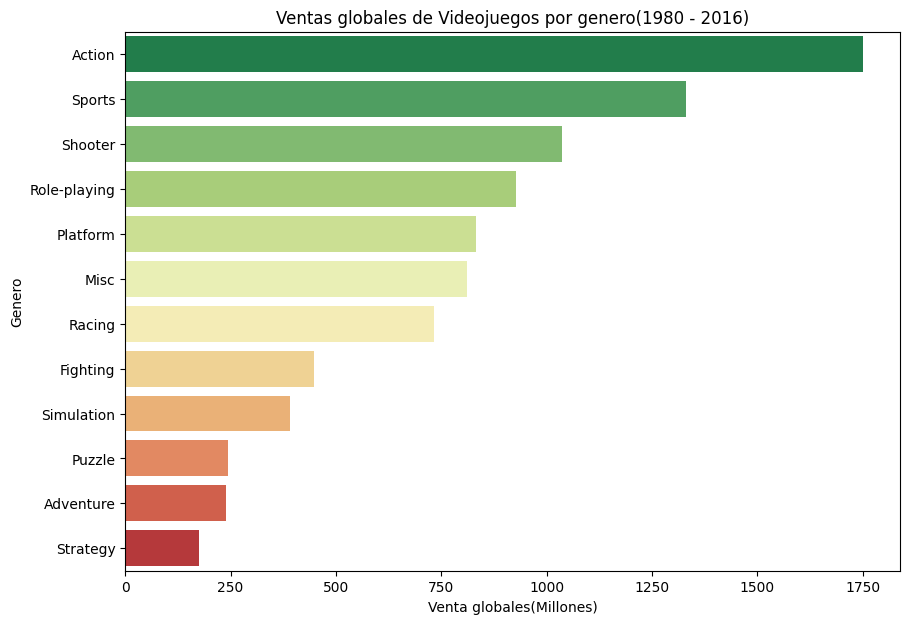

In [29]:
# Creando el grafico de barras con Seaborn
df_genre_sales['Genre'] = df_genre_sales['Genre'].str.capitalize()

palette = sns.color_palette("RdYlGn_r", n_colors = len(df_genre_sales))

plt.figure(figsize = (10, 7))

sns.barplot(
    x = 'Global_Sales',
    y = 'Genre',
    data = df_genre_sales,
    palette = palette,
    hue = 'Genre',
    legend = False
)

plt.title("Ventas globales de Videojuegos por genero(1980 - 2016)")
plt.xlabel("Venta globales(Millones)")
plt.ylabel("Genero")

for index, row in df_genre_sales.iterrows():
  plt.text(
      row['Global_Sales'],
      index,
      f'{row['Global_Sales']: .2f}M',
      color = black,
      ha = 'left',
      va = 'center'
  )

  plt.grid(axis = 'x', linestyle = '--', alpha = 0.6)
  plt.tight_layout()
  plt.show()

## 👑 Editor Más Consumido a Nivel Global

In [30]:
# Agrupar por "Publisher" y sumar por "Global_Sales"
publisher_sales = df_video_games_sales.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending = False)

# Visualizar los datos de las empresas mas consumidas
top_10_publishers = publisher_sales.head(10).reset_index()
top_10_publishers.columns = ['Publisher', 'Global_Sales']
print("Las 10 empresas mas consumidas a nivel global:")
print(top_10_publishers)

Las 10 empresas mas consumidas a nivel global:
                      Publisher  Global_Sales
0                      nintendo       1786.56
1               electronic arts       1110.32
2                    activision        727.46
3   sony computer entertainment        607.50
4                       ubisoft        474.72
5          take-two interactive        399.54
6                           thq        340.77
7  konami digital entertainment        283.64
8                          sega        272.99
9            namco bandai games        254.09


### Grafico de consumo por empresa(Top 10)